In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import pandas as pd


In [43]:
# read csv to df
df = pd.read_csv('data/SF-2003-2018.csv')
df.head()

: 

In [ ]:
# show colum names
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [ ]:
df = df[['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location']]

In [ ]:
# percent of line with Resulution == NONE

print(f"{df[df['Resolution'] == 'NONE'].shape[0] / df.shape[0]} % des appels a la police n'aboutissent a rien" )

0.6399351968161914 % des appels a la police n'aboutissent a rien


<AxesSubplot:ylabel='Resolution'>

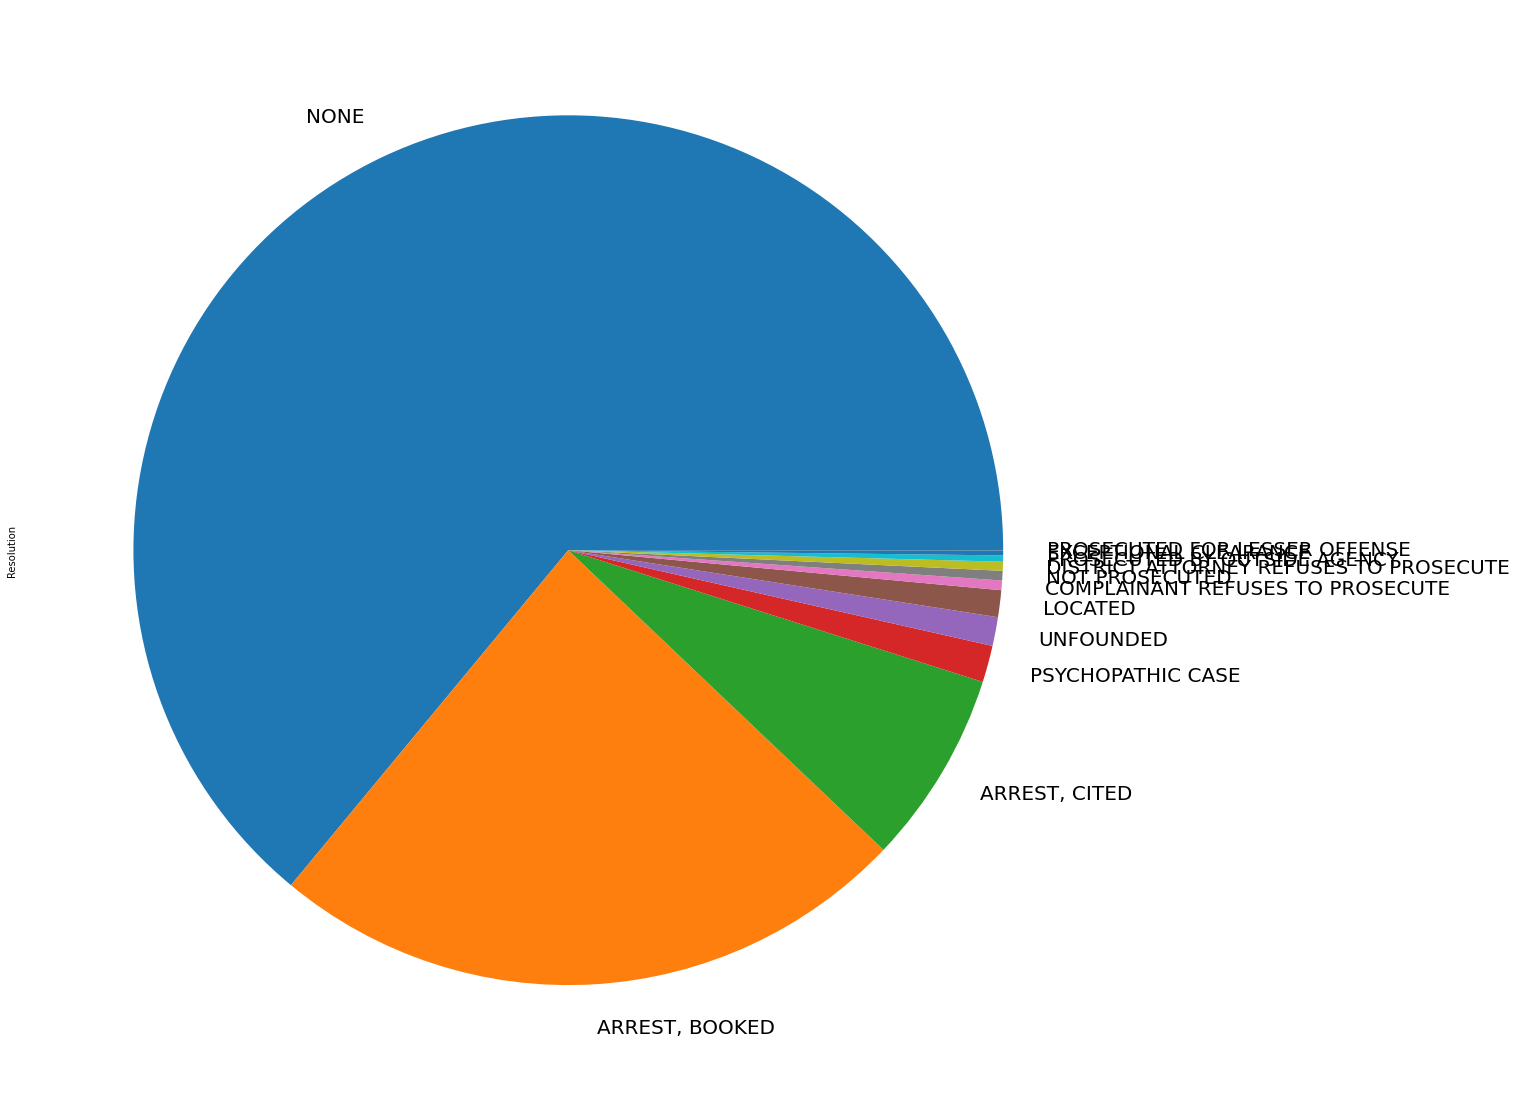

In [ ]:
# pie resolution , bigger size

df['Resolution'].value_counts().plot.pie(figsize=(20, 20), textprops={'fontsize': 20})



<AxesSubplot:ylabel='Category'>

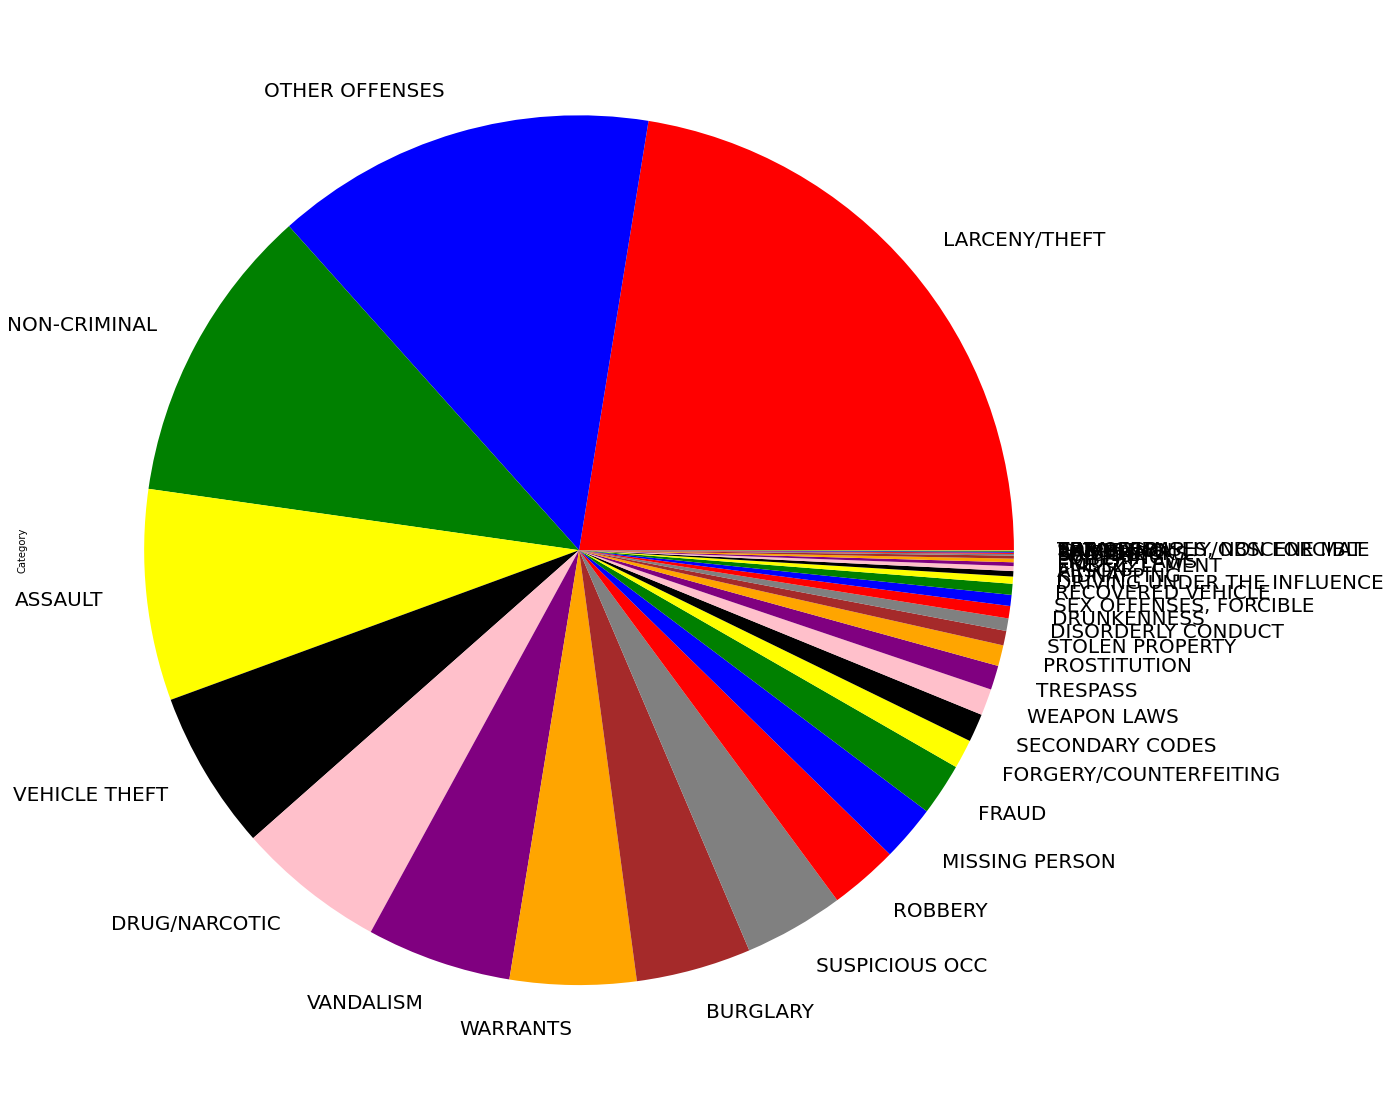

In [ ]:
color = ['red', 'blue', 'green', 'yellow', 'black', 'pink', 'purple', 'orange', 'brown', 'grey']
df['Category'].value_counts().plot.pie(figsize=(20, 20), textprops={'fontsize': 20}, colors=color)

<AxesSubplot:xlabel='X', ylabel='Y'>

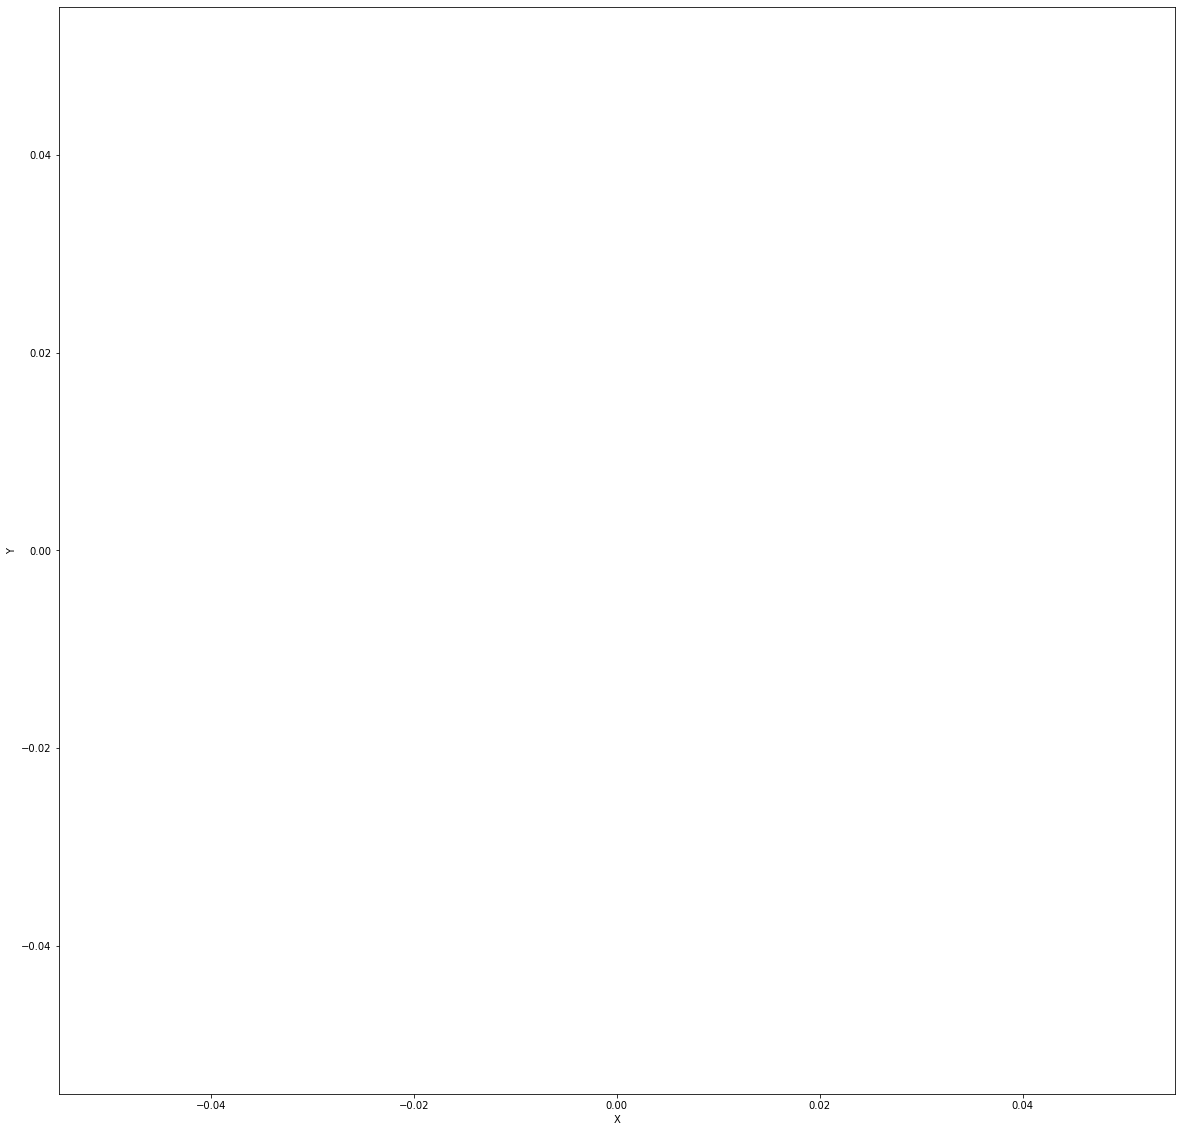

In [ ]:
# plot with x and y, color based on category
# drop nan and xbelow -121
df1 = df.dropna()
df1 = df1[df1['X'] < -121]
df1 = df1[df1['Y'] > 40]

df1.plot.scatter(x='X', y='Y', figsize=(20, 20), c=df1['Category'])


In [ ]:
df

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
